In [11]:
using OptimalControl
using NLPModelsIpopt
using Plots

Sistema Dinámico de Rössler

\begin{aligned}
    \min _u \quad & J_N(y, u)=\int_{0}^{T}{||X(t)-X_{d}||^{2} + \gamma||u(t)||^{2}} dt\\
    \text{sujeto a} \quad & \dot{X_1} = -X_2 - X_3 + u_1 \\ 
                          &  \dot{X_2} = X_1 + aX_2 + u_2 \\
                          & \dot{X_3} = b + X_3 (X_1 - c) + u_3
\end{aligned}

 para $\gamma$, $a$, $b$, $c$ $\in$ $\mathbb{R}$

In [38]:
# Define the dynamics
#Constantes
tf = 10
gamma = 0.1
a = 0.1
b = 2
c = 4
ref = [0, -0.5, 0.5]

# x0, y0, z0
valores_iniciales = [1, -1, 0] 


@def ocp begin 
    t ∈ [0, tf], time
    x ∈ R^3, state
    u ∈ R^3, control
    x(0) == valores_iniciales
    ∂(x)(t) == [-x[2](t)-x[3](t); x[1](t)+a*x[2](t); b+x[3](t)*(x[1](t)-c)] + u(t)
    ∫((x(t)-ref)'*(x(t)-ref)+ gamma*u(t)'*u(t)) → min
end

The (autonomous) optimal control problem is given by:

    t ∈ [0, tf], time
    x ∈ R ^ 3, state
    u ∈ R ^ 3, control
    x(0) == valores_iniciales
    (∂(x))(t) == [-((x[2])(t)) - (x[3])(t); (x[1])(t) + a * (x[2])(t); b + (x[3])(t) * ((x[1])(t) - c)] + u(t)
    ∫((x(t) - ref)' * (x(t) - ref) + gamma * (u(t))' * u(t)) → min

The (autonomous) optimal control problem is of the form:

    minimize  J(x, u) = ∫ f⁰(x(t), u(t)) dt, over [0, 10]

    subject to

        ẋ(t) = f(x(t), u(t)), t in [0, 10] a.e.,

        ϕl ≤ ϕ(x(0), x(10)) ≤ ϕu, 

    where x(t) ∈ R³ and u(t) ∈ R³.

Declarations (* required):
╭────────┬────────┬──────────┬──────────┬───────────┬────────────┬─────────────╮
│ times* │ state* │ control* │ variable │ dynamics* │ objective* │ constraints │
├────────┼────────┼──────────┼──────────┼───────────┼────────────┼─────────────┤
│   V    │   V    │    V     │    X     │     V     │     V      │      V      │
╰────────┴────────┴──────────┴──────────┴───────────┴──────────

In [39]:
sol = solve(ocp)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     8504
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1757

Total number of variables............................:     1757
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1004
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 1.10e+00 3.85e-02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

In [41]:
sol.objective

0.46240395402580664

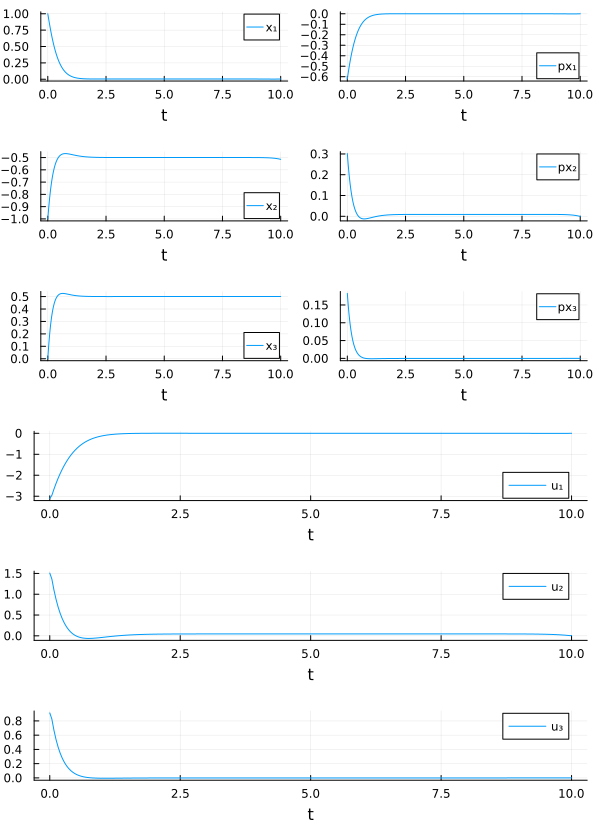

In [40]:
plot(sol)

3-element Vector{Float64}:
  0.004364785720776653
 -0.5143650683455001
  0.5003974552606245